<a href="https://colab.research.google.com/github/OmneyaEssam/Arabic-Dialects-Classification/blob/main/02_BuildModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount("/content/gdrive/") 

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [5]:
data = pd.read_csv("/content/gdrive/MyDrive/AIM_TECH/final_dataset.csv")

In [ ]:
data.head()

,id,dialect,Text3
0,1175358310087892992,IQ,بالنهاية ينتفض يغير
1,1175416117793349632,IQ,يعني محسوب البشر حيونه ووحشيه وتطلبون الغرب يح...
2,1175450108898565888,IQ,مبين كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,وين الغيبه اخ محمد


# EDA

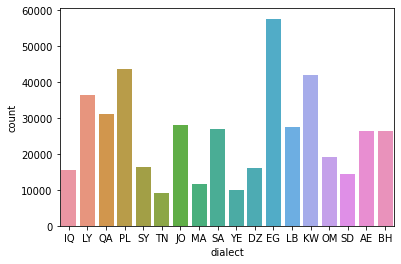

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(x="dialect", data=data)

######                     The data is imbalanced


In [ ]:
print(data['id'].duplicated().sum())

0


In [ ]:
print(data.isna().sum())

id           0
dialect      0
Text3      175
dtype: int64


In [6]:
data.dropna(inplace=True)

# Start with a Machine Learning model

## Split data

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.Text3, data.dialect,stratify=data['dialect'], random_state=42, test_size=0.005, shuffle=True)

In [ ]:
X_train

array(['هه اي اشي يمحي الذنووب', 'بنعرف وحياة سيدي العريان بنعرف',
       'ماش يابراق ليلتين والوضع ركود خير', ...,
       'ناس تمسك كاسة ستاربكس بتفكر حالها ماسكة مفتاح فيراري صباحو',
       'اف والله تضايقون الخاطر حسبي الله عليكم اوادم عبده الفلوس والله اللي يدفع امثر معاه بسكم ناس',
       'عانس شكلها شغالة متعةطالعة نازلةمتعة متعةوصيغة المتعة كلمتانمتعتك نفسي'],
      dtype=object)

## Build pipeline

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from nltk import word_tokenize

textclassifier =Pipeline([
   ('tfidf', TfidfVectorizer()),
   ('smote', SMOTE(random_state=12)),
   ('mnb', MultinomialNB())
])

textclassifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE(random_state=12)),
                ('mnb', MultinomialNB())])

In [25]:
y_pred = textclassifier.predict(X_test)

In [26]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

def Evaluation_metrics(y_pred, y_test):
    
    accuracy = accuracy_score(y_pred, y_test) * 100
    f1 = f1_score(y_pred, y_test, average="weighted") * 100
    recall = recall_score(y_pred, y_test,average="weighted") * 100
    precision = precision_score(y_pred, y_test,average="weighted") * 100
    
    print ("\nResults:")
    print ("PRECISION : %.2f" %precision, "%")
    print ("RECALL : %.2f" %recall, "%")
    print ("F1 SCORE: %.2f" %f1, "%")
    print ("ACCURACY: %.2f" %accuracy, "%\n")

Evaluation_metrics(y_pred,y_test)    


Results:
PRECISION : 56.13 %
RECALL : 55.00 %
F1 SCORE: 54.92 %
ACCURACY: 55.00 %



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


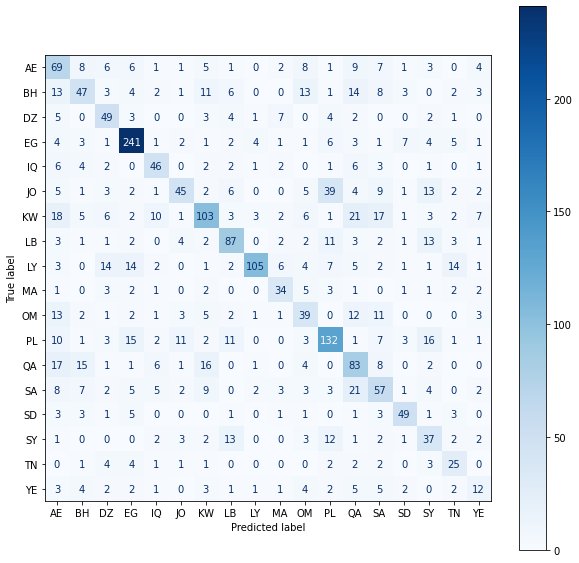

In [31]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(textclassifier, X_test, y_test,ax =ax,cmap=plt.cm.Blues)

In [78]:
import pickle
pickle.dump(textclassifier, open("Naive_Bayes_Classifier", 'wb'))

# Flask API

##installing required libraries

In [55]:
!pip install flask-ngrok
!pip install flask==0.12.2  

     |████████████████████████████████| 83 kB 895 kB/s 
  Attempting uninstall: flask
    Found existing installation: Flask 1.1.4
    Uninstalling Flask-1.1.4:
      Successfully uninstalled Flask-1.1.4


In [56]:
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok   

deb https://ngrok-agent.s3.amazonaws.com buster main
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://ngrok-agent.s3.amazonaws.com buster InRelease [7,470 B]
Get:12 http://security.ubuntu.com/ubuntu bionic-sec

In [57]:
!ngrok authtoken "267Q98jLmbsnvBRNepE17456zOT_4n72aCdPwH7MjqqG2hXgw"

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


## API

In [77]:
from flask_ngrok import run_with_ngrok
from flask import Flask,request, render_template, redirect, url_for
import pickle

app = Flask(__name__, template_folder='/content')
run_with_ngrok(app)
#textclassifier = pickle.load(open("C:/Users/Omneya Essam/Desktop/tutorial/Naive_Bayes_Classifier.pkl","rb"))
  

@app.route('/', methods=['POST', "GET"])
def submit_form():

    request_method = request.method
    if request.method == "POST":
      text = request.form["tweet"]
      return redirect(url_for("process", tweet=text))
    return render_template("form1.html",request_method = request_method)

@app.route("/user/<string:tweet>")
def process(tweet):
    
    pred = textclassifier.predict([tweet])
    string = pred[0]
    prob = round(np.amax(textclassifier.predict_proba([tweet]))*100,2)
    #return "Your tweet  dialect is {} with confidence score = {:.2f}".format(string,round(prob,2))
    return render_template("result.html", dialect = string, prob=prob )
  
if __name__ == "__main__":
  app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://9d2e-35-243-215-147.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [13/Mar/2022 20:01:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Mar/2022 20:01:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Mar/2022 20:01:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Mar/2022 20:02:03] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [13/Mar/2022 20:02:06] "POST / HTTP/1.1" 302 -
127.0.0.1 - - [13/Mar/2022 20:02:06] "GET /user/انا%20من%20مصر HTTP/1.1" 200 -


In [60]:
tweet = 'انا من مصر'
pred = textclassifier.predict([tweet])
pred

array(['EG'], dtype='<U2')

# Trying a deep learning model
## Aravec for arabic word embeddings

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Embedding, LSTM, GRU
import gensim
import spacy 
import nltk 

In [5]:
!wget https://ia802903.us.archive.org/26/items/full_grams_cbow_300_twitter/full_grams_cbow_100_twitter.zip
!unzip full_grams_cbow_100_twitter.zip

--2022-03-13 12:30:57--  https://ia802903.us.archive.org/26/items/full_grams_cbow_300_twitter/full_grams_cbow_100_twitter.zip
Resolving ia802903.us.archive.org (ia802903.us.archive.org)... 207.241.233.53
Connecting to ia802903.us.archive.org (ia802903.us.archive.org)|207.241.233.53|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ia902803.us.archive.org/15/items/full_grams_cbow_300_twitter/full_grams_cbow_100_twitter.zip [following]
--2022-03-13 12:30:58--  https://ia902803.us.archive.org/15/items/full_grams_cbow_300_twitter/full_grams_cbow_100_twitter.zip
Resolving ia902803.us.archive.org (ia902803.us.archive.org)... 207.241.232.103
Connecting to ia902803.us.archive.org (ia902803.us.archive.org)|207.241.232.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1131904811 (1.1G) [application/zip]
Saving to: ‘full_grams_cbow_100_twitter.zip’

full_grams_cbow_100 100%[===================>]   1.05G   788KB/s    in 4

In [9]:
tweets = [tweet for tweet in data['Text3']]
tweets

['بالنهاية ينتفض يغير',
 'يعني محسوب البشر حيونه ووحشيه وتطلبون الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب',
 'مبين كلامه خليجي',
 'يسلملي مرورك وروحك الحلوه',
 'وين الغيبه اخ محمد',
 'يااخي الإرهابي اذا عراقي سعودي فلسطيني وين المشكلة باب الفرضخليجي وماعنده رحمه وين المساس بقدسيتك الله يرضى عنك خلصت مشاكل العرب واختلفنا بجنسيت ابو الطفل المغردين سألوا وين ورجحت وين الكارثة اللي وصلتك',
 'مطلبي يقدم استقالته وفواها اعتذار',
 'خلص والله لعيونكم انا ماعندي شيء معه بالعكس متابعيني اللي بعتز فيهم خلص صافية لبن',
 'يمكن سؤال فات الكثير اللي يصور شنو موقفه وكأنه يوثق بطوله المفروض المصور يحال للقضاء لان نظرات الطفله تستنجد باتجاه الكاميرا',
 'اولا اني ردت رجل جنوبي واللي ذكر حجابها ثانيا انت شدعوه صايره محامي لكوهين صحيح مقولة العراق بلد الغرائب والعجائب',
 'والله الموضوع جدا حساس ويحير اتفق معك انت لاتروح زايد عادي',
 'ان شاء الله اخوه يجمعنه العراق اللي بكل جحيمه حلو',
 'يسعد مساك سيد الحرف الحزين',
 'هه عدوله لبه ورم عدنه خل اتونس همه بكل شيء مارضين فهاي السفره اسمها اتونس وبكيفي',
 'ي

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)

In [11]:
vocab_size = len(tokenizer.word_index)+1
print(vocab_size)
#encode the documents
encoded_docs = tokenizer.texts_to_sequences(tweets)

584754


In [12]:
# to know the maximum length for padding
max_length = max([len(tweet.split()) for tweet in tweets])   
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [13]:
# Load AraVec model from gensim    
aravec = gensim.models.Word2Vec.load("full_grams_cbow_100_twitter.mdl")

In [14]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = aravec.wv.get_vector(word)
        embedding_matrix[i] = embedding_vector
        
    except KeyError:
        continue

In [15]:
y = pd.get_dummies(data['dialect']).values
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(padded_docs, y,stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [18]:
model = Sequential()
embedding = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(embedding)
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(64))
model.add(Flatten())
model.add(Dense(18, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 61, 100)           58475400  
                                                                 
 lstm (LSTM)                 (None, 61, 100)           80400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 18)                1170      
                                                                 
Total params: 58,599,210
Trainable params: 123,810
Non-trainable params: 58,475,400
_________________________________________________________________


In [20]:
model.fit(x_train, y_train, epochs=15 ,verbose=1, validation_data=(x_test, y_test))

Epoch 1/15
11451/11451 [==============================] - 1152s 100ms/step - loss: 2.7683 - accuracy: 0.1269 - val_loss: 2.7706 - val_accuracy: 0.1258
Epoch 2/15
11451/11451 [==============================] - 1137s 99ms/step - loss: 2.5122 - accuracy: 0.1997 - val_loss: 1.9970 - val_accuracy: 0.3535
Epoch 3/15
11451/11451 [==============================] - 1139s 100ms/step - loss: 1.8824 - accuracy: 0.3912 - val_loss: 1.8129 - val_accuracy: 0.4164
Epoch 4/15
11451/11451 [==============================] - 1126s 98ms/step - loss: 1.7520 - accuracy: 0.4369 - val_loss: 1.7439 - val_accuracy: 0.4408
Epoch 5/15
11451/11451 [==============================] - 1129s 99ms/step - loss: 1.6852 - accuracy: 0.4594 - val_loss: 1.7180 - val_accuracy: 0.4487
Epoch 6/15
11451/11451 [==============================] - 1122s 98ms/step - loss: 1.6424 - accuracy: 0.4733 - val_loss: 1.7028 - val_accuracy: 0.4560
Epoch 7/15
11451/11451 [==============================] - 1115s 97ms/step - loss: 1.6100 - accurac

In [21]:
model.save("lstm_model.h5")

# Trying another deep learning model
## use TFIDF vectorizer as a bag of words

In [18]:
tags = data.dialect
text = data.Text3

In [19]:
from sklearn import preprocessing
Encoder = preprocessing.LabelEncoder()
y = Encoder.fit_transform(tags)

In [20]:
import tensorflow.keras.utils
y = tensorflow.keras.utils.to_categorical(y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(text, y,stratify=y, random_state=42, test_size=0.1, shuffle=True)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(binary=True, max_features=10000)
tfidf_train = vec.fit_transform(X_train).astype('float16')
tfidf_test = vec.transform(X_test).astype('float16')

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(64,input_shape=(len(vec.get_feature_names()),)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(18))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                640064    
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 activation_8 (Activation)   (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 18)                594       
                                                                 
 activation_9 (Activation)   (None, 18)               

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


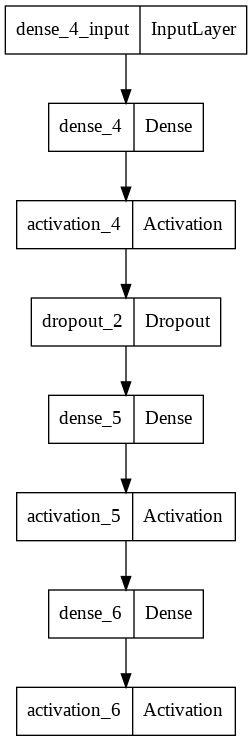

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
from sklearn.utils import class_weight 
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(y_train),
                                                 y= y_train)

In [24]:
history = model.fit(tfidf_train,y_train,epochs=15,verbose=1, validation_data=(tfidf_test, y_test))

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_3/dense_7/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_3/dense_7/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_3/dense_7/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


12882/12882 [==============================] - 184s 14ms/step - loss: 2.2948 - accuracy: 0.2816 - val_loss: 1.9442 - val_accuracy: 0.3851
Epoch 2/15
12882/12882 [==============================] - 156s 12ms/step - loss: 1.9389 - accuracy: 0.3892 - val_loss: 1.8256 - val_accuracy: 0.4281
Epoch 3/15
12882/12882 [==============================] - 187s 14ms/step - loss: 1.8315 - accuracy: 0.4252 - val_loss: 1.7754 - val_accuracy: 0.4442
Epoch 4/15
12882/12882 [==============================] - 182s 14ms/step - loss: 1.7684 - accuracy: 0.4450 - val_loss: 1.7482 - val_accuracy: 0.4520
Epoch 5/15
12882/12882 [==============================] - 185s 14ms/step - loss: 1.7239 - accuracy: 0.4585 - val_loss: 1.7282 - val_accuracy: 0.4587
Epoch 6/15
12882/12882 [==============================] - 187s 14ms/step - loss: 1.6885 - accuracy: 0.4688 - val_loss: 1.7189 - val_accuracy: 0.4603
Epoch 7/15
12882/12882 [==============================] - 185s 14ms/step - loss: 1.6602 - accuracy: 0.4773 - val_loss

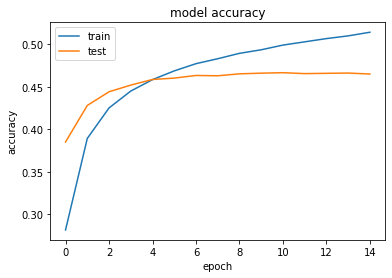

In [25]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()